## BBM409 ASSIGNMENT 1

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data [1]. Maximum Likelihood Estimation requires that the data are sampled from a multivariate normal distribution [2]. 

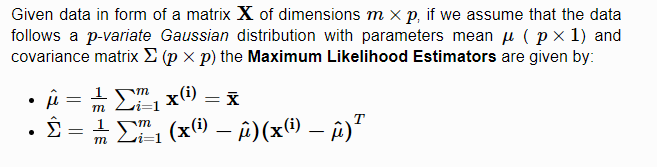

This assignment consists of 3 steps explained below.

Note: Don't forget to add comments in your codes.

[1]: https://en.wikipedia.org/wiki/Maximum_likelihood_estimation#:~:text=In%20statistics%2C%20maximum%20likelihood%20estimation,observed%20data%20is%20most%20probable.

[2]: https://online.stat.psu.edu/stat505/lesson/12/12.7

**Step 1 :** You are provided two CSV files that contains samples derived from two bivariate Gaussian distributions separately; Class1.csv corresponds to $w_{1}$ class distribution, Class2.csv to $w_{2}$.  Estimate the parameters of these distributions using the max-likelihood estimates (given above) on the given data samples for both classes. (10 points) 

Write your codes in the cells shared below.

In [1]:
'''Kayla Akyüz 21726914'''
# Checking if packages are installed
%pip install numpy > null 
%pip install pandas > null

import numpy as np
import pandas

classOne = pandas.read_csv('Class1.csv') # Reading files
classTwo = pandas.read_csv('Class2.csv')
ct1 = classOne.transpose().iloc[1:, :] # Transposing for better calculation
ct2 = classTwo.transpose().iloc[1:, :] # First line is dropped since it was index and when transposed it is ghost row

display(ct1.cov()) # Covariance matrix of first class
display(ct1.mean()) # Mean vector of first class
display(ct2.cov()) # Covariance matrix of second class
display(ct2.mean()) # Mean vector of second class

joined_x = pandas.concat([ct1, ct2], axis= 0).reset_index(drop = True) # joining the X s of data and resetting index
ct1["class"] = 0
ct2["class"] = 1 # adding class meaning Y of our data
joined_t = pandas.concat([ct1, ct2], axis= 0).reset_index(drop = True) # getting a everything joined table
joined_y = pandas.concat([ct1["class"], ct2["class"]], axis= 0).reset_index(drop = True) # Y s table, classes table
%pip install matplotlib > null
%pip install sklearn > null

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


,0,1
0,1.578031,-0.532101
1,-0.532101,3.010579


0   -1.601849
1   -1.740171
dtype: float64

,0,1
0,1.634382,0.518724
1,0.518724,0.767906


0    5.032790
1    3.002618
dtype: float64

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


**Step 2 :** Write a program to find the decision boundaries between the two distributions for $w_{1}$ and $w_{2}$; and plot them. (50 points)

Please explain briefly, why the decision boundary is in the form that you obtained? 

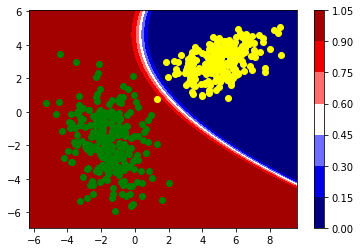

In [2]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

model = GaussianNB() # getting a naive bayes classifier model for gaussian
model.fit(joined_x, joined_y) # fitting the model to our data

min1, max1 = joined_x.iloc[:, 0].min()-1, joined_x.iloc[:, 0].max()+1 # defining boundry of the domain by getting min and max of data
min2, max2 = joined_x.iloc[:, 1].min()-1, joined_x.iloc[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.1) # getting vectors for our grid
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid) # creating dummy grids from vectors

r1, r2 = xx.flatten(), yy.flatten() # flattining the grids
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1)) # horizontaly stacking vectors to create inputs for the model

grid = np.hstack((r1,r2)) 
predictions = model.predict_proba(grid) # predicting values for the grid

predictions = predictions[:, 0] # putting predictions back into a grid
zz = predictions.reshape(xx.shape) # ploting the grid of x, y and z values as a surface

c = plt.contourf(xx, yy, zz, cmap='seismic') # contouring the grid

plt.colorbar(c) # adding color bar to show correlation of color and prediction
plt.scatter(ct1[0], ct1[1], color="Green") # creating scatter plot for each class
plt.scatter(ct2[0], ct2[1], color="Yellow")
plt.show() # showing plot

We have got arched line decision boundry because our data is trained as Bayes Classification model showing the boundry between two gaussian distribution is a linear boundry between their means. Since it is between means you can see that 1 yellow dot which is extreme case. Shaped is arched since it is Bayes Classifier. Classifier type determines the boundry lines shape.

**Step 3 :** You are provided a set of test samples in another CSV file. For each sample in that file, assign the given test samples to the appropriate classes according to the Bayesian Minimum Error-Rate principle. (40 points)

Provide the classification results in tabular form; each row contains the data in the form: ($x_{i_1}$, $x_{i_2}$, $w_{i}$), where $x_{i_1}$ and $x_{i_2}$ represents the value of the first and the second features, respectively; $w_{i}$ represents the assigned class index, i.e. 1 or 2. 

Plot your classification result. Make sure that all samples are depicted in one plot embedded on the computed 
densities with a distinguished color.

Use following prior probabilities: 

Case 1: P($w_{1}$) = P($w_{2}$) = 0.5

Case 2: P($w_{1}$) = 0.8, P($w_{2}$) = 0.2


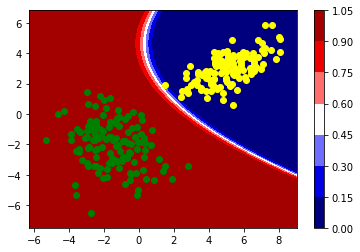

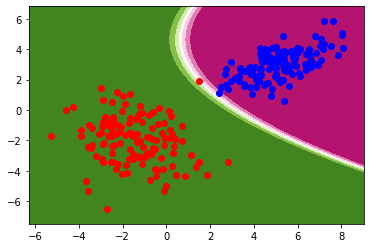

In [3]:
testFile = pandas.read_csv('test.csv') # reading test file
test = testFile.transpose().iloc[1:, :].reset_index(drop = True) # shaping read data to calculable form

case1 = GaussianNB(priors=[0.5, 0.5]) # creating Bayesian Classifier with case 1 weights
case2 = GaussianNB(priors=[0.8, 0.2]) # creating Bayesian Classifier with case 2 weights

case1.fit(joined_x, joined_y) # fitting the case 1 classifier with the data
case2.fit(joined_x, joined_y) # fitting the case 2 classifier with the data

case1predictions = case1.predict(test) # calculating result for the test with case 1 classifier
case2predictions = case2.predict(test) # calculating result for the test with case 2 classifier

test["result1"] = case1predictions  # adding results in the test data for processing
test["result2"] = case2predictions

result1class1 = test.loc[test['result1'] == 0] # dividing the test data according to results
result1class2 = test.loc[test['result1'] == 1]
result2class1 = test.loc[test['result2'] == 0]
result2class2 = test.loc[test['result2'] == 1]

# below is the plotting of the result, basically again we get a grid and run the grid to get colors of it and plot with data points according to colors

min1, max1 = test.iloc[:, 0].min()-1, test.iloc[:, 0].max()+1 # defining bound of the domain by getting min and max of data
min2, max2 = test.iloc[:, 1].min()-1, test.iloc[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.1) # getting vectors for the grid
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid) # creating dummy grids from vectors

r1, r2 = xx.flatten(), yy.flatten() # flattining the grids
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1)) # horizontaly stacking vectors to create inputs for the model

grid = np.hstack((r1,r2)) 
predictions = case1.predict_proba(grid) # predicting values for the grid

predictions = predictions[:, 0] # putting predictions back into a grid
zz = predictions.reshape(xx.shape) # ploting the grid of x, y and z values as a surface

c = plt.contourf(xx, yy, zz, cmap='seismic') # contouring the grid

plt.colorbar(c) # adding color bar to show correlation of color and prediction

plt.scatter(result1class1[0], result1class1[1], color="Green") # creating scatter plot for each class
plt.scatter(result1class2[0], result1class2[1], color="Yellow") # creating scatter plot for each class
plt.show() # showing plot

predictions = case2.predict_proba(grid) # predicting values for the grid

predictions = predictions[:, 0] # putting predictions back into a grid
zz = predictions.reshape(xx.shape) # ploting the grid of x, y and z values as a surface

c = plt.contourf(xx, yy, zz, cmap='PiYG') # contouring the grid

plt.scatter(result2class1[0], result2class1[1], color="Red") # creating scatter plot for each class
plt.scatter(result2class2[0], result2class2[1], color="Blue") # creating scatter plot for each class
plt.show() # showing plot
# At the result we can see some dots in the middle changed color. That is because of the bias.